#### Sequence Classification with LSTM Recurrent Neural Networks in Python with Keras on Large Movie Review Dataset 

https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

/Users/liang/envbase/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

In [3]:
top_words=5000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=top_words)

In [4]:
print(X_train.shape,len(X_train[:10][0]),len(X_train[:10][1]))


(25000,) 218 189


In [5]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [6]:
print(X_train.shape,X_train[:10])


(25000, 500) [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   4 3231  152 ...   72   33   32]
 [   0    0    0 ...   28  126  110]
 [   0    0    0 ...    7   43   50]]


In [7]:
embedding_vecor_length = 100
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist_1=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 219s 9ms/step - loss: 0.4566 - acc: 0.7809 - val_loss: 0.3946 - val_acc: 0.8345
Epoch 2/3
25000/25000 [==============================] - 218s 9ms/step - loss: 0.3042 - acc: 0.8777 - val_loss: 0.3322 - val_acc: 0.8592
Epoch 3/3
25000/25000 [==============================] - 218s 9ms/step 

In [8]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%"%(scores[1]*100))
import pandas as pd
df_hist_1 = pd.DataFrame(hist_1.history)
df_hist_1.tail(10)

Accuracy: 86.71%


,val_loss,val_acc,loss,acc
0,0.394606,0.83448,0.456602,0.78088
1,0.332222,0.85920,0.304229,0.87768
2,0.323231,0.86712,0.244707,0.90416


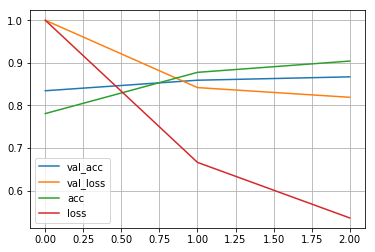

In [9]:
df_hist_1.val_loss /= df_hist_1.val_loss.max()
df_hist_1.loss /= df_hist_1.loss.max()
df_hist_1.val_acc.plot()
df_hist_1.val_loss.plot()
df_hist_1.acc.plot()
df_hist_1.loss.plot()
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# create the model
embedding_vecor_length = 100
model_drop = Sequential()
model_drop.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_drop.add(Dropout(0.2))
model_drop.add(LSTM(100))
model_drop.add(Dropout(0.2))
model_drop.add(Dense(1, activation='sigmoid'))
model_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_drop.summary())
hist_2=model_drop.fit(X_train, y_train, epochs=5, batch_size=64)
# Final evaluation of the model
scores_drop = model_drop.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores_drop[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
25000/25000 [==============================] - 188s 8ms/step - loss: 0.4621 - acc: 0.7782
Epoch 2/5
25000/25000 [========

In [11]:
embedding_vecor_length = 32
model_lstm_drop = Sequential()
model_lstm_drop.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_lstm_drop.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm_drop.add(Dense(1, activation='sigmoid'))
model_lstm_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm_drop.summary())
model_lstm_drop.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores_lstm_drop = model_lstm_drop.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
25000/25000 [==============================] - 198s 8ms/step - loss: 0.5069 - acc: 0.7490
Epoch 2/3
25000/25000 [==============================] - 196s 8ms/step - loss: 0.3683 - acc: 0.8468
Epoch 3/3
25000/25000 [==============================] - 202s 8ms/step - loss: 0.3642 - acc: 0.8486
Accuracy: 81.33%


In [13]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model_cnn = Sequential()
model_cnn.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_cnn.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(LSTM(100))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn.summary())
model_cnn.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores_cnn[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
25000/25000 [==============================] - 91s 4ms/step - loss: 0.4207 - acc: 0.7922
Epoch 2/3
25000/25000 [=========